**SEBASTIAN GAVIRIA GIRALDO** \\
**C.C. 1017270713**

In [29]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Problema 1

Usando el set `PS4_1.csv`, convertir la serie `Date` en el indice (serie de tiempo) y eliminar la serie `Unnamed: 1` (generado por pandas), retornar un  diccionario con en el siguiente orden:

* Cantidad de columnas
* Nombre de las columnas
* Número de registros no NaN de cada columna
* Cantidad total de memoria usada para cargar el dataset en el computador ,( df.memory_usage() )
* Estadistica basica para cada columna, media, desviacion estandar, maximo
* Remplazar los NaN por None

In [ ]:
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTWsahNju_LTtJBjuaaILBx_3QutbzK-HCjGoLtrtcIBEu4rOQgdiz17AD8SDa13g/pub?output=csv"
df = pd.read_csv(path)
df.head()

Date Unnamed: 1  Berri1  Maisonneuve_1  Maisonneuve_2  Brebeuf
0  01/01/2009       0:00      29             20             35      NaN
1  02/01/2009       0:00      19              3             22      NaN
2  03/01/2009       0:00      24             12             22      NaN
3  04/01/2009       0:00      24              8             15      NaN
4  05/01/2009       0:00     120            111            141      NaN

In [ ]:
#Ahora la columna de índices es la columna Date

df = df.set_index("Date")
df.head()

Unnamed: 1  Berri1  Maisonneuve_1  Maisonneuve_2  Brebeuf
Date                                                                
01/01/2009       0:00      29             20             35      NaN
02/01/2009       0:00      19              3             22      NaN
03/01/2009       0:00      24             12             22      NaN
04/01/2009       0:00      24              8             15      NaN
05/01/2009       0:00     120            111            141      NaN

In [ ]:
#Eliminar la columna "Unnamed: 1"

del df["Unnamed: 1"]
df.head()

Berri1  Maisonneuve_1  Maisonneuve_2  Brebeuf
Date                                                     
01/01/2009      29             20             35      NaN
02/01/2009      19              3             22      NaN
03/01/2009      24             12             22      NaN
04/01/2009      24              8             15      NaN
05/01/2009     120            111            141      NaN

In [ ]:
def columnas_(df):
  Cantidad_de_columnas = df.shape[1] #Cantidad de columnas
  return Cantidad_de_columnas

def Nombres(df):
  Nombre_de_columnas = list(df.columns) #Nombre de columnas
  return Nombre_de_columnas

def noNaN(df):
  tf = pd.isnull(df)
  d = {}
  for col in tf.columns:
    S = []
    for i in range(len(tf)):
      if tf[col][i] == False:
        S.append(i)
        d[col] = len(S)
  return d

def Memoria(df):
  #Memoria
  r = list(df.memory_usage())
  s = {}
  for col in df.columns:
    for y in range(len(r)):
      s[col] = r[y]
  return s

def Media(df):
  #Estadística ; media
  a = df.mean(axis=0)
  m = {}
  for col in df.columns:
    m[col] = a[col]
  return m

def Desv_st(df):
  #Estadística ; std
  a1 = df.std(axis=0)
  m1 = {}
  for col in df.columns:
    m1[col] = a1[col]
  return m1

def Maximo(df):
  #Estadística ; max
  a2 = df.max(axis=0)
  m2 = {}
  for col in df.columns:
    m2[col] = a2[col]
  return m2

In [ ]:
def dicc(df):
  diccionario = {}
  diccionario["Cantidad de columnas"] = columnas_(df)
  diccionario["Nombre de columnas"] = Nombres(df)
  diccionario["no NaN"] = noNaN(df)
  diccionario["Memoria"] = Memoria(df)
  diccionario["Medias"] = Media(df)
  diccionario["Desviaciones std"] = Desv_st(df)
  diccionario["Máximos"] = Maximo(df)
  print(diccionario)

dicc(df)

{'Cantidad de columnas': 4, 'Nombre de columnas': ['Berri1', 'Maisonneuve_1', 'Maisonneuve_2', 'Brebeuf'], 'no NaN': {'Berri1': 365, 'Maisonneuve_1': 365, 'Maisonneuve_2': 365, 'Brebeuf': 178}, 'Memoria': {'Berri1': 2920, 'Maisonneuve_1': 2920, 'Maisonneuve_2': 2920, 'Brebeuf': 2920}, 'Medias': {'Berri1': 2032.2, 'Maisonneuve_1': 1060.2520547945205, 'Maisonneuve_2': 2093.1698630136984, 'Brebeuf': 2576.3595505617977}, 'Desviaciones std': {'Berri1': 1878.8797986572208, 'Maisonneuve_1': 1079.5330858971347, 'Maisonneuve_2': 1854.3685230878293, 'Brebeuf': 2484.0047433344985}, 'Máximos': {'Berri1': 6626.0, 'Maisonneuve_1': 4242.0, 'Maisonneuve_2': 6587.0, 'Brebeuf': 7575.0}}


In [ ]:
#Reemplazo de NaN por None

df["Brebeuf"] = df["Brebeuf"].fillna("None") 
df.head()

Berri1  Maisonneuve_1  Maisonneuve_2 Brebeuf
Date                                                    
01/01/2009      29             20             35    None
02/01/2009      19              3             22    None
03/01/2009      24             12             22    None
04/01/2009      24              8             15    None
05/01/2009     120            111            141    None

# Problema 2

Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019. 


1. Ver la estadistica general del data frame.
2. Dejar las columnas PrimaryType, y Date.
3. Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandaspd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").
4. Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee:
   df.groupby(columna).Date.count()
   
   sort_values()
5. Ordenar los valores por orden alfabetico de Primary type
6. Mostrar de la fila 100 a la 120
6. Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
   ax = sns.barplot(x = "contador", y="Primary Type", data = datos)

In [6]:
link = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQqCpt9ad3JYNclQrdwHtqJVnMlMyNHI-p176ceLZSIZxK9aacD5xaCE3M5oItoTQOjsgm7aEXXW-V0/pub?output=csv"
df = pd.read_csv(link)
df.head()

Unnamed: 0        Primary Type                   Date
0           0  DECEPTIVE PRACTICE  09/24/2019 8:00:00 AM
1           1               THEFT  10/13/2019 8:30:00 PM
2           2               THEFT  10/05/2019 6:30:00 PM
3           3     CRIMINAL DAMAGE  10/13/2019 7:00:00 PM
4           4             ASSAULT  10/13/2019 2:10:00 PM

In [9]:
#Estadística general

x = pd.DataFrame(df["Primary Type"].describe())
y = pd.DataFrame(df["Date"].describe())

print(x)
print(y)

       Primary Type
count          1000
unique           23
top           THEFT
freq            296
                         Date
count                    1000
unique                    679
top     10/13/2019 9:00:00 PM
freq                       19


In [10]:
#Eliminar Unnamed: 0

del df["Unnamed: 0"]
df.head()

Primary Type                   Date
0  DECEPTIVE PRACTICE  09/24/2019 8:00:00 AM
1               THEFT  10/13/2019 8:30:00 PM
2               THEFT  10/05/2019 6:30:00 PM
3     CRIMINAL DAMAGE  10/13/2019 7:00:00 PM
4             ASSAULT  10/13/2019 2:10:00 PM

In [15]:
#Formato fecha

pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p")
df.Date

0       09/24/2019 8:00:00 AM
1       10/13/2019 8:30:00 PM
2       10/05/2019 6:30:00 PM
3       10/13/2019 7:00:00 PM
4       10/13/2019 2:10:00 PM
                ...          
995    10/14/2019 10:47:00 PM
996     10/14/2019 4:00:00 AM
997    10/14/2019 10:25:00 AM
998     10/14/2019 7:00:00 PM
999     10/14/2019 4:10:00 PM
Name: Date, Length: 1000, dtype: object

In [20]:
datos = df.groupby("Primary Type").Date.count().sort_values(ascending=True)
DataFrame = pd.DataFrame(datos)
DataFrame.head()

Date
Primary Type                           
STALKING                              1
CONCEALED CARRY LICENSE VIOLATION     1
LIQUOR LAW VIOLATION                  2
PROSTITUTION                          2
SEX OFFENSE                           3

In [25]:
 df.sort_values("Primary Type").head()

Primary Type                    Date
145        ARSON   10/13/2019 9:47:00 PM
992        ARSON   10/14/2019 3:57:00 AM
406        ARSON  05/08/2019 12:53:00 AM
516      ASSAULT   10/13/2019 4:32:00 AM
519      ASSAULT   10/13/2019 3:11:00 PM

In [24]:
fil = df.iloc[100:121]
fil

Primary Type                    Date
100  INTERFERENCE WITH PUBLIC OFFICER  10/13/2019 10:34:00 PM
101                     OTHER OFFENSE   10/13/2019 2:02:00 PM
102                           BATTERY   10/13/2019 1:21:00 PM
103                             THEFT   04/03/2019 9:15:00 AM
104                           BATTERY  10/13/2019 12:26:00 AM
105                DECEPTIVE PRACTICE   10/13/2019 9:26:00 AM
106                DECEPTIVE PRACTICE   10/13/2019 3:00:00 PM
107                           BATTERY   10/13/2019 1:50:00 AM
108                             THEFT  10/04/2019 12:56:00 AM
109                           BATTERY   10/13/2019 9:31:00 PM
110                             THEFT   10/13/2019 8:00:00 PM
111                          BURGLARY   10/13/2019 7:00:00 AM
112                   CRIMINAL DAMAGE   10/13/2019 9:30:00 AM
113                           BATTERY   10/13/2019 2:54:00 AM
114                           BATTERY   10/13/2019 1:00:00 AM
115                             THEFT   10/13/2019 4:37:00 PM
116                             THEFT   10/13/2019 3:30:00 PM
117                           BATTERY   10/13/2019 8:45:00 AM
118                             THEFT   10/13/2019 2:00:00 PM
119                DECEPTIVE PRACTICE  10/12/2019 10:20:00 PM
120                           BATTERY  10/13/2019 12:45:00 AM

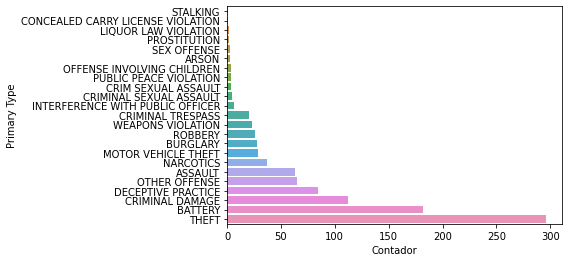

In [28]:
datos = datos.reset_index()
datos = datos.rename(columns={"Date":"Contador"})
ax = sns.barplot(x = "Contador", y="Primary Type", data = datos)

ax

# Problema 3

1. Leer el dataset country_vaccinations.csv  y filtrar los datos para Colombia
2. Crear un csv con los datos para colombia
3. Realizar una comparacion con los paises latinoamericanos. 
4. A traves de mascaras determinar el numero de vacunados en el intervalo  [1.5E6, 2.0E6]

In [31]:
link2="https://docs.google.com/spreadsheets/d/e/2PACX-1vSJ7bFjFQu-VmuwebbH0vrg8a3b168p6aTsglLbMISvmgYmg9yGT6mPdlAUVeBl1lU1Cxnj9wtNxghu/pub?output=csv"
df = pd.read_csv(link2)
df.head()

country  ...                                     source_website
0  Afghanistan  ...  http://www.xinhuanet.com/english/asiapacific/2...
1  Afghanistan  ...  http://www.xinhuanet.com/english/asiapacific/2...
2  Afghanistan  ...  http://www.xinhuanet.com/english/asiapacific/2...
3  Afghanistan  ...  http://www.xinhuanet.com/english/asiapacific/2...
4  Afghanistan  ...  http://www.xinhuanet.com/english/asiapacific/2...

[5 rows x 15 columns]

In [35]:
af = df.country == "Colombia"
df1 = df[af]
df1 = df1.reset_index() # este es el csv nuevo

334252.0

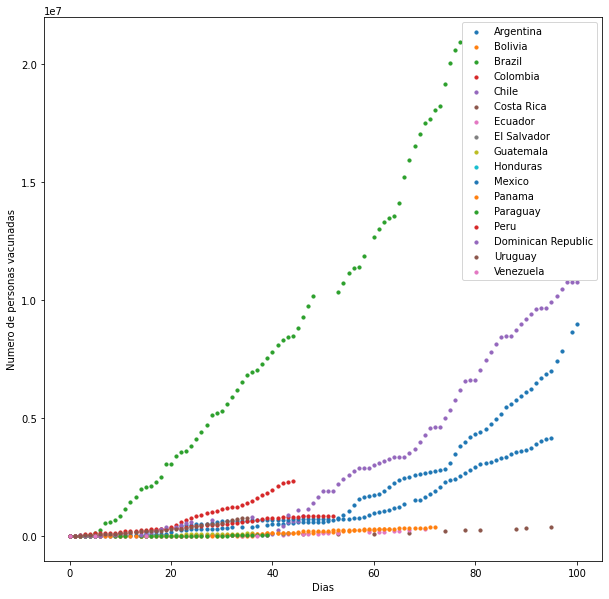

In [37]:
Latinos = ["Argentina","Bolivia","Brazil","Colombia","Chile","Costa Rica","Ecuador","El Salvador","Guatemala","Honduras","Mexico","Panama","Paraguay","Peru","Dominican Republic","Uruguay","Venezuela"]

fig, ax = plt.subplots(figsize = (10,10)) 
for pais in Latinos:
  af = df[df["country"] == pais]
  af = af.reset_index()
  plt.scatter(list(af.index),af.total_vaccinations, s = 10, label = pais)
  df['country'].value_counts().tolist()
  ax.legend()
  ax.set_xlabel("Dias")
  ax.set_ylabel("Numero de personas vacunadas")

  af1 = df1[df1.total_vaccinations.apply(lambda x: x>=1.5E6 and x<=2.0E6)]

  c = 0
  for i in af1["daily_vaccinations"]:
    c += i

c